In [5]:
import numpy as np
import time
from scipy.optimize import fsolve
from matplotlib import pyplot as plt
import scipy.linalg as la

**EXERCISE 2.1**

In [2]:
β = .442
δ = .6415
σ = 3.
A = 1.
α = .35

nvec = np.array([1.0, 1.0, 0.2])

In [99]:
def w_fun(K, A, α):
    
    w = (1-α)*A*( (K/2.2)**α )
    
    return w

def r_fun(K, A, α, δ):
    
    r = α*A* ( (2.2/K)**(1 - α) ) - δ
    
    return r

In [4]:
def feasible(f_params, bvec_guess):
    K_cnstr = np.full(1, False)
    c_cnstr = np.full(3, False)
    b_cnstr = np.full(2, False)
     
    nvec, A, α, δ = f_params
    b2, b3 = bvec_guess
    
    K = b2 + b3
    if K <= 0: #FEASIBILITY TEST 1
        K_cnstr[0] = True
    
    w = w_fun(K, A, α)
    r = r_fun(K, A, α, δ)
    
    # budget constraints: cons<0?
    c = np.zeros(3)
    c[0] = nvec[0]*w - b2  
    c[1] = nvec[1]*w + (1+r) * b2 - b3 
    c[2] = nvec[2]*w + (1+r) * b3 
    
    c_cnstr = (c <= 0) #FEASIBILITY TEST 2
        
    if c_cnstr[0] == True: #FEASIBILITY TEST 3
        b_cnstr[0] = True
    if c_cnstr[1] == True:
        b_cnstr[0] = True
        b_cnstr[1] = True
    if c_cnstr[2] == True:
        b_cnstr[1] = True
    
    return b_cnstr, c_cnstr, K_cnstr

In [5]:
#execute the feasibility tests
f_params = (nvec, A, α, δ)
bvec_guess = np.array([1.0,1.2])

b_cnstr, c_cnstr, K_cnstr = feasible(f_params, bvec_guess)
print("Feasibility test b2, b3:", b_cnstr)
print("Feasibility test C:", c_cnstr)
print("Feasibility test K:", K_cnstr)

Feasibility test b2, b3: [ True False]
Feasibility test C: [ True False False]
Feasibility test K: [False]


In [6]:
#execute the feasibility tests
f_params = (nvec, A, α, δ)
bvec_guess = np.array([0.06,-0.001])

b_cnstr, c_cnstr, K_cnstr = feasible(f_params, bvec_guess)
print("Feasibility test b2, b3:", b_cnstr)
print("Feasibility test C:", c_cnstr)
print("Feasibility test K:", K_cnstr)

Feasibility test b2, b3: [False False]
Feasibility test C: [False False False]
Feasibility test K: [False]


In [7]:
#execute the feasibility tests
f_params = (nvec, A, α, δ)
bvec_guess = np.array([0.1,0.1])

b_cnstr, c_cnstr, K_cnstr = feasible(f_params, bvec_guess)
print("Feasibility test b2, b3:", b_cnstr)
print("Feasibility test C:", c_cnstr)
print("Feasibility test K:", K_cnstr)

Feasibility test b2, b3: [False False]
Feasibility test C: [False False False]
Feasibility test K: [False]


**EXERCISE 2.2**

In [8]:
def EulErr(bvec, *args):
    
    β, σ, nvec, L, A, α, δ, SS_tol = args
    b2, b3 = bvec
    
    K = b2 + b3
    w = w_fun(K, A, α)
    r = r_fun(K, A, α, δ)
    
    c = np.zeros(3)
    c[0] = nvec[0]*w - b2  
    c[1] = nvec[1]*w + (1+r) * b2 - b3 
    c[2] = nvec[2]*w + (1+r) * b3
    
    u_prime = np.zeros(3)
    for i in range(len(c)):
        u_prime[i] = c[i]**(-σ)
    
    Err1 = u_prime[0] - β*(1+r)*u_prime[1]
    Err2 = u_prime[1] - β*(1+r)*u_prime[2]
    
    return Err1, Err2

In [9]:
def get_SS(params, bvec_guess, SS_graphs=True):
    start_time = time.clock()
    
    β, σ, nvec, L, A, α, δ, SS_tol = params
    b2, b3 = bvec_guess
    
    b_ss = np.zeros(2)
    c_ss = np.zeros(3)
    EulErr_ss = np.zeros(2)
    
    b2_ss, b3_ss = fsolve(EulErr, bvec_guess, params, xtol=SS_tol)
    b_ss = [b2_ss, b3_ss]

    K_ss = b2_ss + b3_ss
    w_ss = w_fun(K_ss, A, α)
    r_ss = r_fun(K_ss, A, α, δ)   
    
    c_ss[0] = nvec[0]*w_ss - b2_ss  
    c_ss[1] = nvec[1]*w_ss + (1+r_ss) * b2_ss - b3_ss 
    c_ss[2] = nvec[2]*w_ss + (1+r_ss) * b3_ss
    C_ss = c_ss[0]+ c_ss[1] +c_ss[2]
    
    Y_ss = A * (K_ss)**α * L**(1-α)
    
    EulErr_ss = EulErr(b_ss, *params)
    
    RCerr_ss = Y_ss - C_ss - δ * K_ss
    
    ss_time = time.clock() - start_time
    
    if SS_graphs == True:
        xlist = np.arange(1, 4, 1)
        ylist = c_ss
        ylist2 = [0, b2_ss, b3_ss]
        plt.plot(list(xlist), list(ylist), label="Consumption")
        plt.plot(list(xlist), list(ylist2), label="Savings (t-1)")
        plt.xlabel("Phase of life")
        plt.xticks(xlist)
        plt.legend()
        plt.grid()
        plt.show()
    
    return {'b_ss': b_ss, 'c_ss': c_ss, 'w_ss': w_ss, 'r_ss': r_ss, \
            'K_ss': K_ss, 'Y_ss': Y_ss, 'C_ss': C_ss, 'EulErr_ss': EulErr_ss, \
            'RCerr_ss': RCerr_ss, 'ss_time': ss_time}

In [10]:
L = 2.2
SS_tol = .001
params = ((β, σ, nvec, L, A, α, δ, SS_tol))
bvec_guess = np.array([0.1,0.1])

#ss_output = get_SS(params, bvec_guess, SS_graphs=True)

In [11]:
EulErr(bvec_guess, *params) #test

(153.24316594590596, -34.0285338336267)

C:\Users\woute\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Users\woute\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


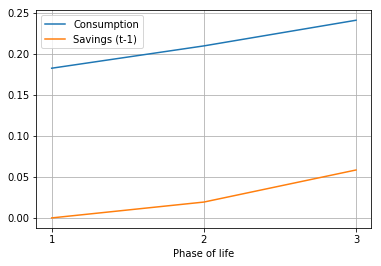

{'b_ss': [0.019312619463691887, 0.05841242850003624],
 'c_ss': array([0.18241333, 0.20961424, 0.24087656]),
 'w_ss': 0.20172594930955895,
 'r_ss': 2.433025771148647,
 'K_ss': 0.07772504796372812,
 'Y_ss': 0.6827647515092765,
 'C_ss': 0.6329041332405448,
 'EulErr_ss': (-0.00253830951726286, 0.0054862020055423955),
 'RCerr_ss': 9.020562075079397e-17,
 'ss_time': 0.001039461999997826}

In [12]:
get_SS(params, bvec_guess)

C:\Users\woute\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Users\woute\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


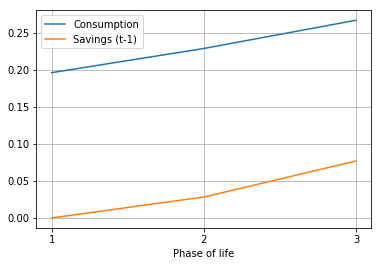

{'b_ss': [0.028177158966823063, 0.0768658282087841],
 'c_ss': array([0.1959755 , 0.22861645, 0.26669351]),
 'w_ss': 0.2241526567163615,
 'r_ss': 1.8863668551637944,
 'K_ss': 0.10504298717560716,
 'Y_ss': 0.7586705304246083,
 'C_ss': 0.6912854541514561,
 'EulErr_ss': (0.0008754449501395811, 0.0001379523985463038),
 'RCerr_ss': 1.6653345369377348e-16,
 'ss_time': 0.0005304049999992344}

In [13]:
β = .55
params = ((β, σ, nvec, L, A, α, δ, SS_tol))
get_SS(params, bvec_guess)

Increasing $\beta$ (i.e. agents' their patience), leads to higher steady-state levels of savings and consumption for all ages. Intuitively, as agents are more patient, they are more willing to save for the future. As a result, the higher built up capital leads to higher production and, consequently, consumption. The growth of $Y$ moverover, coincides with higher wages and a lower interest rate (i.e. a lower return on the saved capital).

**EXERCISE 2.3**

In [170]:
#reset beta
β = .442

# Additional parameters
T = 25
tol = 1e-9
ξ = .2
MaxItr = 1000

In [171]:
# Guess T where economy in SS
params = ((β, σ, nvec, L, A, α, δ, SS_tol))
ss_economy = get_SS(params, bvec_guess, False)
b2_bar, b3_bar = ss_economy['b_ss']
K_bar = b2_bar + b3_bar
print(K_bar)

# Initial transition path
b2_1 = .8*b2_bar
b3_1 = 1.1*b3_bar
K_1 = b2_1 + b3_1

KPath = np.linspace(K_1, K_bar, T)
KPath = np.append(KPath, K_bar)
#print(KPath)

0.07772504796372812


C:\Users\woute\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Users\woute\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [172]:
def w_fun(K, A, α):
    
    w = (1-α)*A*( (K/2.2)**α )
    
    return w

def r_fun(K, A, α, δ):
    
    r = α*A* ( (2.2/K)**(1 - α) ) - δ
    
    return r

In [173]:
wPath = w_fun(KPath, A, α)
rPath = r_fun(KPath, A, α, δ)
w_bar = w_fun(K_bar, A, α)
r_bar = r_fun(K_bar, A, α, δ)

wPath = np.append(wPath, w_bar)
rPath = np.append(rPath, r_bar)

#print(wPath)
#print(rPath)

In [174]:
def Eul_b3(b3p, *args):

    params, rpath, wpath, b2 = args
    β, σ, nvec, L, A, α, δ, SS_tol = params

    c1 = wPath[0]*nvec[1] + (1+rPath[0])*b2 - b3p
    c2 = wpath[1]*nvec[2] + (1+rPath[1])*b3p 
    
    # Calculate marginal utility of consumption
    u_prime1 = c1**(-σ)
    u_prime2 = c2**(-σ)
    
    # Calculate error from intertemporal Euler Equation
    Err_b3p = u_prime1 - β*(1+rPath[1])*u_prime2
    
    return Err_b3p

In [175]:
def Eul_b23(bvec, *args):

    params, rPath, wPath = args
    β, σ, nvec, L, A, α, δ, SS_tol = params  
    
    c = np.zeros(3)
    c[0] = nvec[0]*wPath[0] - bvec[0]  
    c[1] = nvec[1]*wPath[1] + (1+rPath[0]) * bvec[0] - bvec[1] 
    c[2] = nvec[2]*wPath[2] + (1+rPath[1]) * bvec[1]
    
    u_prime = np.zeros(3)
    for i in range(len(c)):
        u_prime[i] = c[i]**(-σ)
    
    Err1 = u_prime[0] - β*(1+rPath[0])*u_prime[1]
    Err2 = u_prime[1] - β*(1+rPath[1])*u_prime[2]
    
    return [Err1, Err2]

In [180]:
ϵ = tol + 1
itr = 1

while (itr < MaxItr and ϵ > tol):
    #print(itr)
    bPaths = np.zeros((T+1,2))
    ErrPaths = np.zeros((T+1, 2))

    bPaths[0,0] = b2_1
    bPaths[0,1] = b3_1

    Eul_b3_arg = params, rPath[:2], wPath[:2], b2_1    
    b3_p, b3_p_info, xtr, ytr = fsolve(Eul_b3, b3_1, Eul_b3_arg, xtol=SS_tol,full_output=1)
    #print(b3_p)
    
    bPaths[1,1] = b3_p
    ErrPaths[1,1] = b3_p_info['fvec']
     
    for tt in range(1,T):
        #print(rPath[tt:tt+2])
        Eul_b23_arg = params, rPath[tt:tt+2], wPath[tt-1:tt+2]
        b23, b23_info, xtr, ytr = fsolve(Eul_b23, [.10, .10], Eul_b23_arg, xtol=SS_tol,full_output=1)
        #print(b23)
        
        bPaths[tt,0] = b23[0]
        bPaths[tt+1,1] = b23[1]
        ErrPaths[tt,0] = b23_info['fvec'][0]
        ErrPaths[tt+1,1] = b23_info['fvec'][1]
    
    MaxAbsErrs = np.abs(ErrPaths[1:-1,:]).max(axis=0)
    
    KPath_prime = bPaths[:-1].sum(axis=1)
    KPath_prime = np.append(KPath_prime, K_bar)
    
    ϵ = la.norm(KPath_prime - KPath, 2)
    
    KPath_p = ξ*KPath_prime + (1-ξ)*KPath
    KPath = np.copy(KPath_p)
    
    wPath = w_fun(KPath, A, α)
    rPath = r_fun(KPath, A, α, δ)    
    
    itr = itr + 1   

In [182]:
print(MaxAbsErrs)

[0.00039231 0.00080666]


In [186]:
Yt = A * (KPath[:-1] ** α) * (L **(1 - α))
Ct = L * wPath[:-1] + (1 + rPath[:-1]) * bPaths[:-1,0] - bPaths[1:,0] + (1 + rPath[:-1]) * bPaths[:-1,1] - bPaths[1:,1]
RC_Err = Yt - Ct - KPath[1:] + (1 - δ) * KPath[:-1]
MaxRC_Err = np.abs(RC_Err).max()
print(MaxRC_Err)

0.01931360115250051


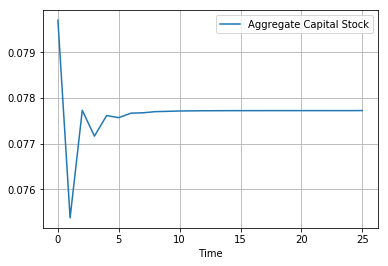

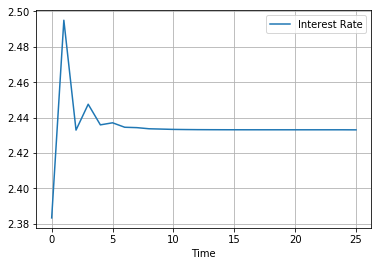

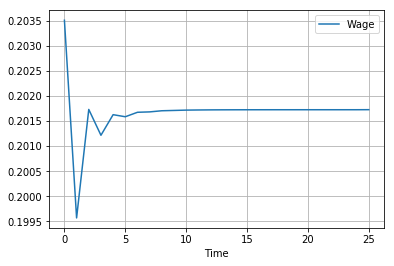

In [187]:
plt.plot(KPath, label='Aggregate Capital Stock')
plt.xlabel('Time')
plt.grid()
plt.legend()
plt.show()

plt.plot(rPath, label='Interest Rate')
plt.xlabel('Time')
plt.grid()
plt.legend()
plt.show()

plt.plot(wPath, label='Wage')
plt.xlabel('Time')
plt.grid()
plt.legend()
plt.show()

In [191]:
print(np.where(np.abs(KPath - K_bar) < 0.00001)[0])

[ 2 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25]


It takes 2 periods for the economy to get within 0.00001 of the steady-state aggregate capital stock.

After 10 periods the aggregate capital stock never again is farther than 0.00001 away from the steady-state.

**EXERCISE 3.2**

In [118]:
S = 80
years = 80

β = .96**(years/S)
δ = 1. - (1. - 0.05)**(years/S)
σ = 3.
A = 1.
α = .35

nvec = np.ones(S)
bound= round((2*S/3))
nvec[bound:]=0.2
#print(bound)
#print(nvec)
L = np.sum(nvec)
#print(L)

In [119]:
def w_fun(K, L, A, α):
    
    w = (1-α)*A*( (K/L)**α )
    
    return w

def r_fun(K, L, A, α, δ):
    
    r = α*A* ( (L/K)**(1 - α) ) - δ
    
    return r

In [120]:
def EulErr(bvec, *args):
    
    β, σ, nvec, L, A, α, δ, SS_tol = args
    
    K = np.sum(bvec)
    w = w_fun(K, L, A, α)
    r = r_fun(K, L, A, α, δ)
    
    c = np.zeros_like(bvec)
    c = np.append(c, 0)

    T = len(bvec)+1
    for cc in range(T):
        #print(c)
        if cc == 0:
            c[cc] = nvec[cc]*w - bvec[cc]  
        elif cc == T-1:
            c[cc] = nvec[cc]*w + (1+r) * bvec[cc-1]  
        else:
            c[cc] = nvec[cc]*w + (1+r) * bvec[cc-1] - bvec[cc]    
    
    #print(c)
            
    u_prime = np.zeros_like(c)
    for i in range(T):
        u_prime[i] = c[i]**(-σ)
    
    Errors = np.zeros_like(bvec)
    for i in range(T-1):
            Errors[i] = β*(1+r)*u_prime[i+1] - u_prime[i]
    
    #print(Errors)
    
    return Errors

In [135]:
def get_SS(params, bvec_guess, SS_graphs=True):
    start_time = time.clock()
    
    β, σ, nvec, L, A, α, δ, SS_tol = params
    
    b_ss = np.zeros_like(bvec_guess)
    c_ss = np.zeros_like(b_ss)
    c_ss = np.append(c_ss, 0)
    
    b_ss = fsolve(EulErr, bvec_guess, params, xtol=SS_tol)
    #print(b_ss)
    
    K_ss = np.sum(b_ss)
    w_ss = w_fun(K_ss, L, A, α)
    r_ss = r_fun(K_ss, L, A, α, δ)   
    
    T = len(bvec_guess)+1
    for cc in range(T):
        if cc == 0:
            c_ss[cc] = nvec[cc]*w_ss - b_ss[cc]  
        elif cc == T-1:
            c_ss[cc] = nvec[cc]*w_ss + (1+r_ss) * b_ss[cc-1]  
        else:
            c_ss[cc] = nvec[cc]*w_ss + (1+r_ss) * b_ss[cc-1] - b_ss[cc]
    
    C_ss = np.sum(c_ss)
    Y_ss = A * (K_ss)**α * L**(1-α)
    
    EulErr_ss = np.zeros_like(bvec_guess)
    EulErr_ss = EulErr(b_ss, *params)
    
    RCerr_ss = Y_ss - C_ss - δ * K_ss
    
    ss_time = time.clock() - start_time
    
    if SS_graphs == True:
        xlist = np.arange(1, T+1, 1)
        xlist2 = np.arange(0, T+1, 5)
        ylist = c_ss
        ylist2 = [0]
        ylist2 = np.append(ylist2, b_ss)
        plt.figure(figsize=(15,8))
        plt.plot(list(xlist), list(ylist), label="Consumption")
        plt.plot(list(xlist), list(ylist2), label="Savings (t-1)")
        plt.xlabel("Phase of life")
        plt.xticks(xlist2)
        plt.legend()
        plt.grid()
        plt.show()
    
    return {'b_ss': b_ss, 'c_ss': c_ss, 'w_ss': w_ss, 'r_ss': r_ss, \
            'K_ss': K_ss, 'Y_ss': Y_ss, 'C_ss': C_ss, 'EulErr_ss': EulErr_ss, \
            'RCerr_ss': RCerr_ss, 'ss_time': ss_time}

C:\Users\woute\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Users\woute\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


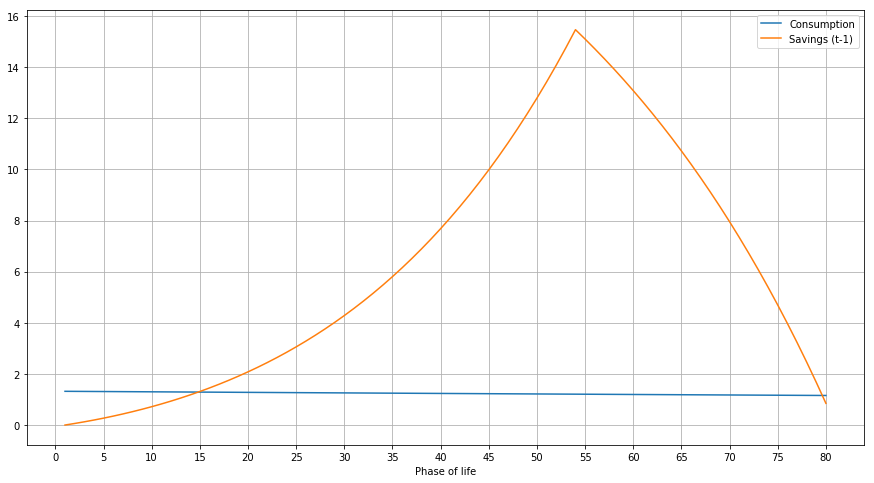

In [136]:
SS_tol = .001
params = ((β, σ, nvec, L, A, α, δ, SS_tol))

bvec_guess = np.ones(S-1)*0.01

ss_output = get_SS(params, bvec_guess)

In [124]:
print("Running time:", ss_output['ss_time'])
#print(ss_output['EulErr_ss'])
print("Resource constraint error:", ss_output['RCerr_ss'])

Running time: 0.16214748299989878
Resource constraint error: -1.7763568394002505e-14


C:\Users\woute\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Users\woute\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


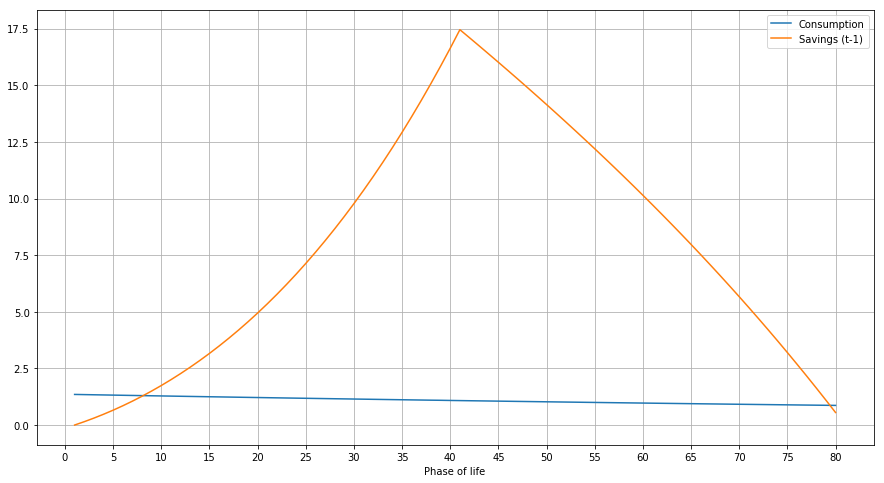

In [144]:
SS_tol = .001

nvec = np.ones(S)
bound= round(S/2)
nvec[bound:]=0.2

params = ((β, σ, nvec, L, A, α, δ, SS_tol))

bvec_guess = np.ones(S-1)*0.2

ss_output = get_SS(params, bvec_guess)

In [138]:
print(ss_output)

{'b_ss': array([ 0.14711779,  0.30537234,  0.4749915 ,  0.65620846,  0.84926295,
        1.05440042,  1.27187238,  1.50193676,  1.74485798,  2.0009071 ,
        2.27036196,  2.55350741,  2.85063541,  3.16204523,  3.48804366,
        3.82894511,  4.18507186,  4.55675425,  4.94433081,  5.34814854,
        5.76856301,  6.20593866,  6.66064893,  7.13307658,  7.62361391,
        8.13266297,  8.66063565,  9.20795382,  9.77504981, 10.36236846,
       10.97037031, 11.59953339, 12.25035007, 12.92331918, 13.61893876,
       14.33770457, 15.08011294, 15.8466869 , 16.63594738, 17.45254407,
       17.09654685, 16.73795979, 16.37668595, 16.01262752, 15.64568287,
       15.27574647, 14.90271159, 14.52647172, 14.14691984, 13.76394681,
       13.37743971, 12.9872809 , 12.59334784, 12.19551358, 11.79364769,
       11.3876172 , 10.97728751, 10.56252279, 10.14318593,  9.71913797,
        9.29023711,  8.85633761,  8.41728897,  7.97293576,  7.52311806,
        7.06767245,  6.60643265,  6.13922922,  5.665888